
# Projeto Especial - Segmentação de clientes

#### Henry Frederick Ridwan Surjadi, Tiago Sessa Brioschi e Victor Sampaio Monteiro

#### 17 de Novembro de 2021


## README
* Esse projeto irá apresentar como...................


### Summary WORKING ;D
* The steps in a data analysis:
+ [The Question](#the-question)
+ [The Dataset](#the-dataset)
+ [Obtaining the data](#obtaining-the-data)
+ [Cleaning the data](#cleaning-the-data)
+ [Exploratory data analysis](#exploratory-data-analysis)
+ [Statistical prediction modeling](#statistical-prediction-or-modeling)
+ [Interpretation of results](#interpretation-of-results)
+ [Challenging of results](#challenging-of-results)
+ [Creating reproducible code](#creating-reproducible-code)


### The Question 

Será possível criar uma estratégia de marketing a partir da análise qualitativa e quantitativa dos dados de um respectivo shopping?

## The Dataset
Dados obtidos no site Kaggle que é uma comunidade online de cientistas de dados e praticantes de aprendizagem de máquina que fornece datasets para estudo.

O link do dataset é ...Exemplo <https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet#html>

O dataset possui os seguintes dados:
1. **CustomerID**: Id do cliente.
2. **Genre**: Sexo do cliente.
3. **Age**: Idade do cliente.
4. **Annual Income(k$)**: Salário anual do cliente.
5. **Spending Score(1-100)**: Um score dado a um cliente pelas autoridades do shopping baseado na quantidade de dinheiro gasto e no comportamento do cliente.

### Obtaining the data

In [1]:
# Importação da Biblioteca pandas para a leitura dos dados
import pandas as pd

# Criação do dataframe df a partir do arquivo Mall_Customers.csv usando o método read_csv da biblioteca pandas
# coloca-se o index da coluna igual a 0 devido a coluna CustomerID para melhor visualização, mas não é obrigatório
df = pd.read_csv("Mall_Customers.csv", index_col=0)

# Verificando a estrutura do dataset
df

,Genre,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
...,...,...,...,...
196,Female,35,120,79
197,Female,45,126,28
198,Male,32,126,74


O data set apresenta uma *structure* de 4 variáveis com 200 observações

In [2]:
# Verificando os tipos dos dados
df.dtypes

Genre                     object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [3]:
# Verificando o formato das colunas do data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Genre                   200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


### Cleaning the data

In [4]:
#   Verificar se existe Valor Nulo
df.isnull().sum()

Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

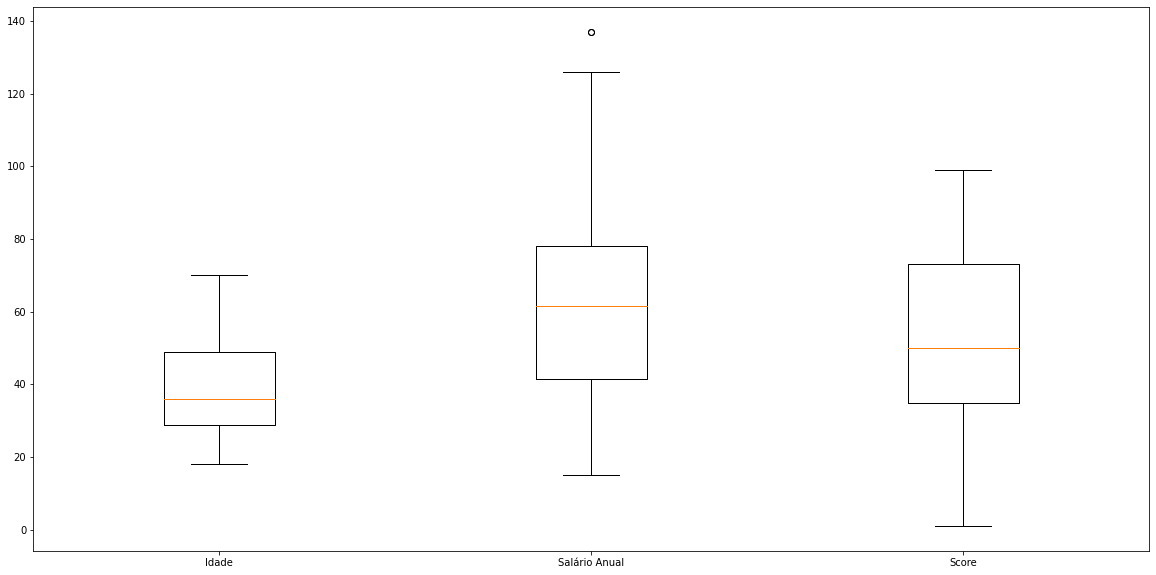

In [5]:
#   Verificarndo Outliers com Matplotlib

#   Importação da Biblioteca Matplotlib para a geração de gráficos
import matplotlib.pyplot as plt

#   Criação de labels para o boxplot
labels = ['Idade', 'Salário Anual', 'Score']
#   Utilizando o boxplot da biblioteca matplotlib
plt.figure(figsize=[20,10])
plt.boxplot(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']], labels=labels)
plt.show()

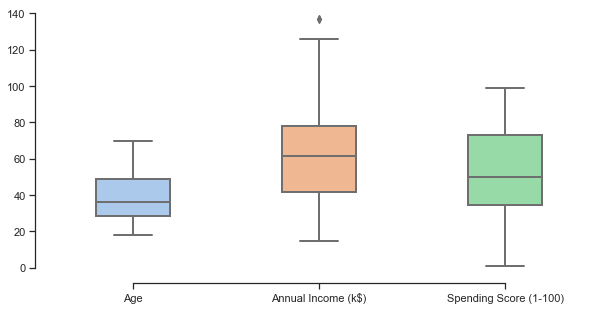

In [6]:

#   Verificando Outliers com Seaborn
import seaborn as sns
plt.figure(figsize =[10,5])
sns.set_theme(style="ticks", palette="pastel")
sns.boxplot(data=df, width=0.4, linewidth=2)
sns.despine(trim=True, offset=5)
plt.show()

Verifica-se aparentemente a ocorrência de um Outlier, porém o dado em si, encontra-se na coluna de Salário Anual, então não é uma informação conclusiva.

### Exploratory Data Analysis

In [7]:
# Através do método head, faz a leitura das primeiras linhas do data frame df
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [8]:
# Através do método tail, faz a leitura das ultimas linhas do data frame df
df.tail()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
196,Female,35,120,79
197,Female,45,126,28
198,Male,32,126,74
199,Male,32,137,18
200,Male,30,137,83


In [9]:
# Entendendo os dados, calculando um resumo das estatisticas do DataFrame
df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


Analisando os dados acima, verifica-se a príncipio o seguinte:

+   A media de idade dos clientes é de aproximadamente 39 anos;
+   O salário anual máximo dos clientes é de 137 k$;
+   A média do Score dos clientes é de 50.

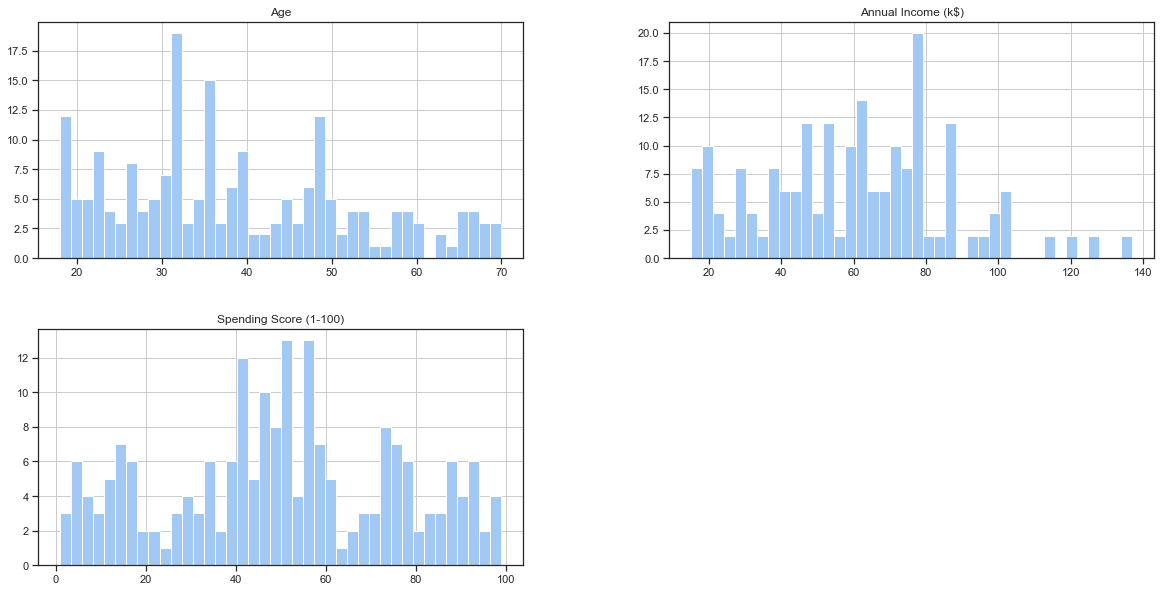

In [10]:
#   Visualização de dados das colunas a partir de histogramas
df.hist(figsize=(20,10) , bins= 40)
plt.show()

Analisando os gráficos acima, observa-se que aparentemente a concentração dos clientes:
+   Possuem em média de 30 a 40 anos, ou seja um público jovem;
+   O salário anual varia de 60 a 80 k$;
+   O score médio varia entre 40 a 60;

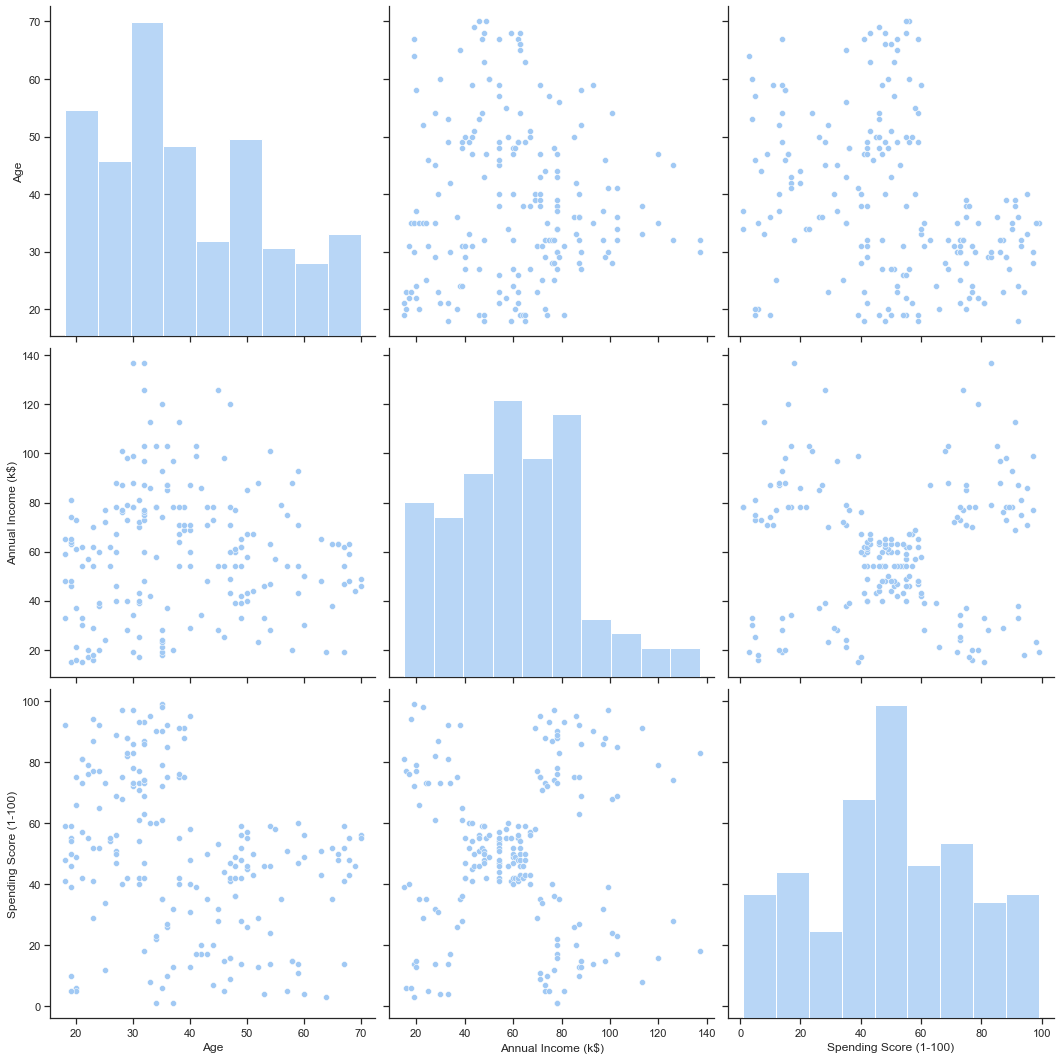

In [11]:
#   Visualização das colunas Age x Annual Income x Spending Score
## Utilizando pandas
#pd.plotting.scatter_matrix(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)'] ] , figsize=(20, 10))
#plt.show()

##  Utilizando Seaborn
import seaborn as sns
sns.pairplot(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']], height=5)
plt.show()

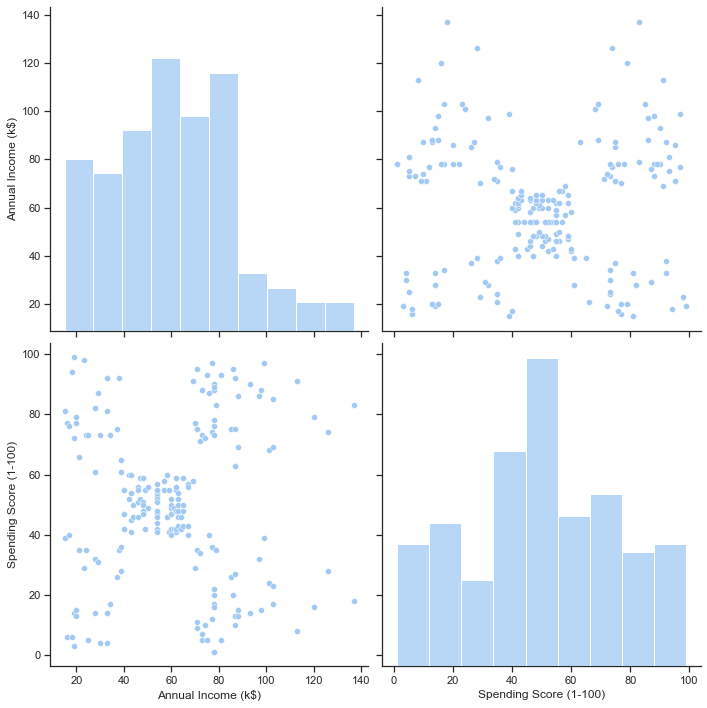

In [12]:
#pd.plotting.scatter_matrix(df[['Annual Income (k$)', 'Spending Score (1-100)']] , figsize=(20, 10))
#plt.show()

sns.pairplot(df[['Annual Income (k$)', 'Spending Score (1-100)']], height=5)

Observa-se que o gráfico 'Spending Score' x 'Annual Income (k$)' possui algum padrão que vale a pena ser investigado

In [13]:
#   Correlação entre as variáveis do df
corr = df.corr()
corr

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


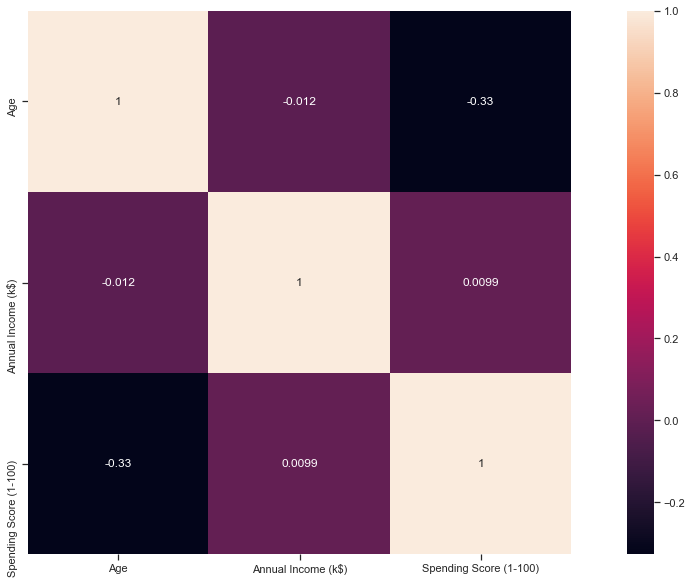

In [14]:
#   Visualização da correlação no 'heatmap'
plt.figure(figsize = [20,10])
sns.heatmap(corr, cbar=True, square= True, annot=True)
plt.show()

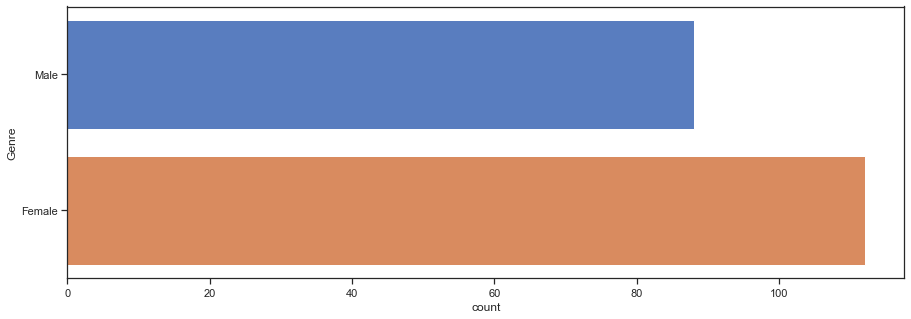

In [15]:
# Importação da Biblioteca seaborn
import seaborn as sns

# Visualização do gráfico de barras com a coluna sexo
plt.figure(figsize = (15 , 5))
sns.set_theme(style="ticks", palette="muted")
sns.countplot(y = 'Genre', data = df)
plt.show()

In [16]:
# Vericando a quantidade de Homens e Mulheres
df["Genre"].value_counts()

Female    112
Male       88
Name: Genre, dtype: int64

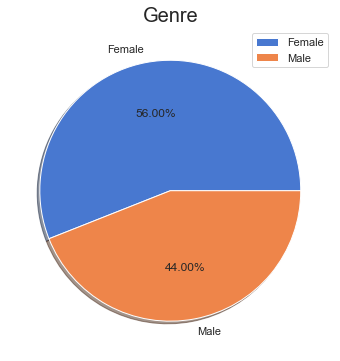

In [17]:
#   Criação da lista 'labels' e da variavel 'valores' que recebe os valores da coluna Genre
labels = ["Female", "Male"]
valores = df["Genre"].value_counts()

#   Tamanho do gráfico
plt.rcParams['figure.figsize'] = (6,6)

#   Função do gráfico em pizza, que recebe o array 'valores', e a lista 'labels'
#   com a configuração de sombra = True para melhor visualização
#   e com autopct para configuração de porcentagem
plt.pie(valores, labels=labels, shadow=True, autopct='%.2f%%')

#   Titulo do Gráfico
plt.title('Genre', fontsize = 20)

#   Sem legenda no eixo X
plt.axis('off')

#   legenda do gráfico
plt.legend()
plt.show()

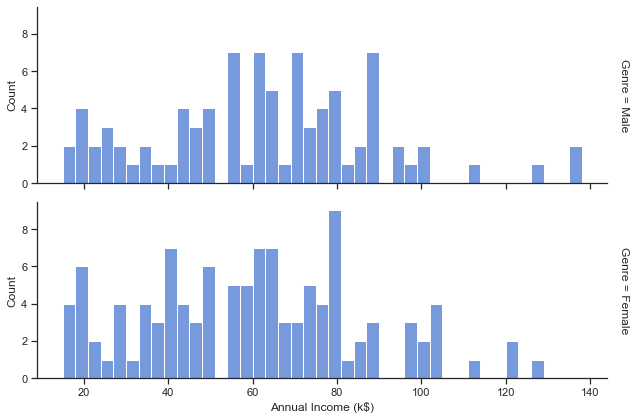

In [18]:
#   Visualização dos salários anuais a partir do genero
sns.displot(
    df, x="Annual Income (k$)", row="Genre", aspect=3,
    binwidth=3, height=3, facet_kws=dict(margin_titles=True)
)
plt.show()

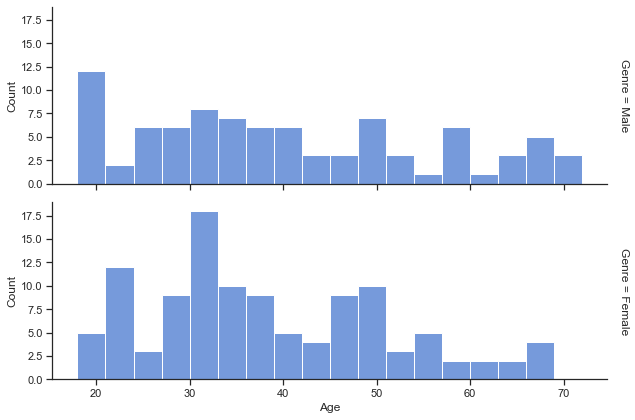

In [19]:
#   Verificar a concentração de pessoas que possuem determinada idade
sns.displot(
    df, x="Age", row="Genre", aspect=3,
    binwidth=3, height=3, facet_kws=dict(margin_titles=True)
)
plt.show()

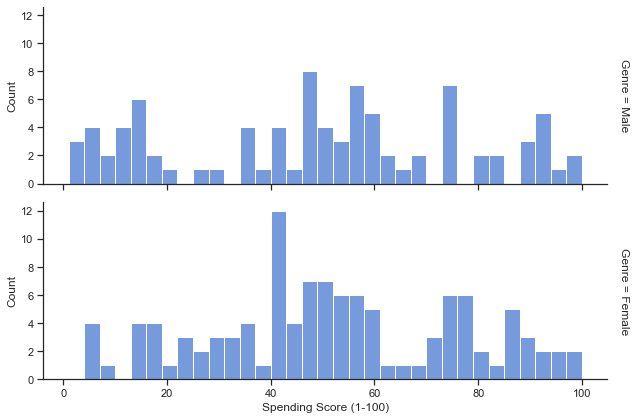

In [20]:
#   Verificar padrões na coluna Score
sns.displot(
    df, x="Spending Score (1-100)", row="Genre", aspect=3,
    binwidth=3, height=3, facet_kws=dict(margin_titles=True)
)
plt.show()

In [21]:
#   Verificar padrões de consumo nos homens e mulheres

### Statistical prediction or modeling


In [22]:
# Criação da variável X que recebe apenas os valores colunas Annual Income e Spending Score
X = df.iloc[:, [2, 3]].values

C:\Users\henry\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


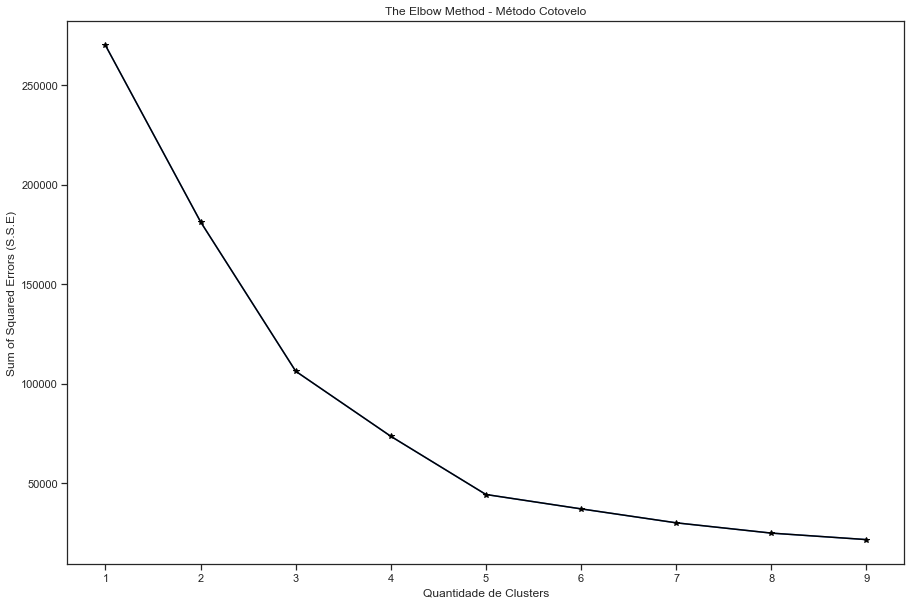

In [23]:
# Importando a bibliote Numpy
import numpy as np

# Importanto o método KMeans da biblioteca scikit learn
from sklearn.cluster import KMeans

# Criação de uma lista para receber as distorções
distortions = []

# Criação da variável k que recebe valores de dez clusters
K = range(1, 10)

# Loop para cálculo do modelo KMeans e suas distorções
for k in K:
    
    kmeansModel = KMeans(n_clusters = k, init = 'k-means++',    random_state = 23)
    # Treina o modelo Kmeans a partir dos dados de X
    kmeansModel.fit(X)
    # Adiciona as distorções na lista
    distortions.append(kmeansModel.inertia_)
    
# Chamada de funções da biblioteca matplotlib para melhorar a visualização do gráfico
#   Tamanho do gráfico
plt.rcParams['figure.figsize'] = (15,10)
#   Tamanho da fonte
plt.rc("font", size=15)
#   Dados que serão plotados no gráfico
plt.plot(K, distortions)
#   Titulo do Gráfico
plt.title("The Elbow Method - Método Cotovelo")
#   Legenda do eixo x
plt.xlabel("Quantidade de Clusters")
#   Legenda do Eixo y - Sum of Squared Errors
plt.ylabel("Sum of Squared Errors (S.S.E)")
#   Pontos estrelas na linha do gráfico para melhor visualização
plt.plot(K, distortions, marker="*", c="black")
plt.show()

Observando-se o gráfico resultante da aplicação do método *Elbow*, verifica-se que o número ideal de clusters a ser utilizado pela algoritmo KMeans é 5!

MELHORAR A EXPLICAÇÃO DO GRÁFICO / DAR MAIS DETALHES

Tentar melhorar o gráfico e colocar uma linha reta do inicio ao fim 

In [24]:
# Criação da variável que irá receber o algoritmo KMeans, setando o número de clusters para 5
kmeansModel = KMeans(n_clusters = 5, init = 'k-means++', random_state = 23)

# Criação da variável Y que irá receber os valores agrupados pelo KMeans
Y = kmeansModel.fit_predict(X)

# Printa os valores de preditos de Y
Y

array([0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 1,
       0, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 4, 2, 1, 2, 4, 2, 4, 2,
       1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2])

In [25]:
#   Verifica se ocorreu o agrupamento correto em 5 clusters
np.unique(Y)

array([0, 1, 2, 3, 4])

In [26]:
#   Criação da variável 'centroides' que irá receber a posição dos clusters calculados pelo KMeans 
centroides = kmeansModel.cluster_centers_

#   Printa os valores dos 'centroides'
centroides

array([[26.30434783, 20.91304348],
       [55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636],
       [88.2       , 17.11428571]])

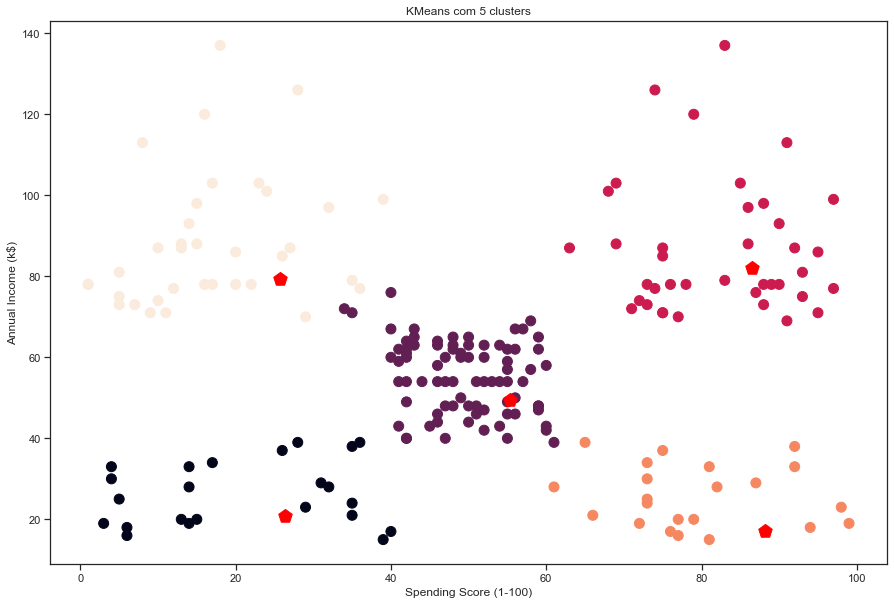

In [27]:
#   Visualização da clusterização do algoritmo KMeans utilizando o gráfico 'scatter'
plt.scatter(df['Spending Score (1-100)'],  df['Annual Income (k$)'], s=100, c=Y)

#   Visualização da localização dos centroides em azul
#   marker = tipo do marcador - p = pentagono
#   s = tamanho do marcador
plt.scatter(centroides[:,0], centroides[:,1], color='red', marker='p', s=200) 

#   Legenda do eixo X
plt.xlabel('Spending Score (1-100)')
#   Legenda do eixo Y
plt.ylabel('Annual Income (k$)')
#   Titulo do Gráfico
plt.title('KMeans com 5 clusters')

plt.show()

###  Interpretation of results


A FAZER

##  Challenging of results

A FAZER

##  Creating reproducible code

A FAZER